Оцінювання наявності даної роботи буде враховувати як наявність самих візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання не буде зараховане за наявне.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [14]:
# cell for imports. All imports must go here.
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import io
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [8]:
uploaded = files.upload()

df = pd.read_csv('train.csv')

Saving train.csv to train (1).csv


In [11]:
print("Інформація про колонки:")
for i, col in enumerate(df.columns):
    non_null_count = df[col].notnull().sum()
    dtype = df[col].dtype
    print(f"{i}. {col} — Тип: {dtype}, Непорожні: {non_null_count}/{len(df)}")

print("\n📄 Перші 5 рядків датафрейму:")
print(df.head(5))

Інформація про колонки:
0. PassengerId — Тип: int64, Непорожні: 891/891
1. Survived — Тип: int64, Непорожні: 891/891
2. Pclass — Тип: int64, Непорожні: 891/891
3. Name — Тип: object, Непорожні: 891/891
4. Sex — Тип: object, Непорожні: 891/891
5. Age — Тип: float64, Непорожні: 714/891
6. SibSp — Тип: int64, Непорожні: 891/891
7. Parch — Тип: int64, Непорожні: 891/891
8. Ticket — Тип: object, Непорожні: 891/891
9. Fare — Тип: float64, Непорожні: 891/891
10. Cabin — Тип: object, Непорожні: 204/891
11. Embarked — Тип: object, Непорожні: 889/891

📄 Перші 5 рядків датафрейму:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...

# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

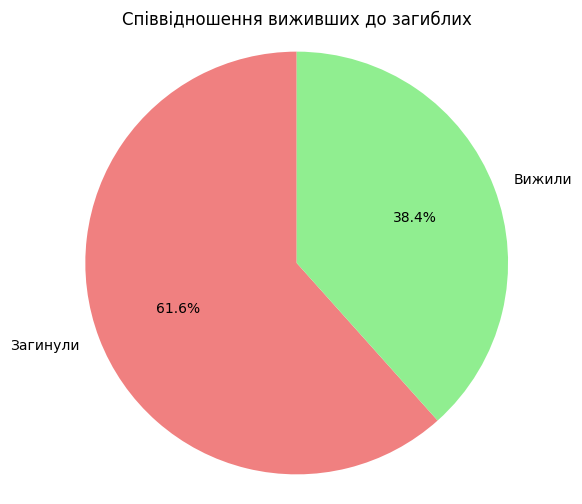

In [13]:
survival_counts = df['Survived'].value_counts()

labels = ['Загинули', 'Вижили']
colors = ['lightcoral', 'lightgreen']

plt.figure(figsize=(6,6))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Співвідношення виживших до загиблих')
plt.axis('equal')
plt.show()

На цій діаграмі зображено відсоткове співвідношення пасажирів, які вижили та загинули в аварії "Титаніка". Як видно, більша частина пасажирів загинула (понад 60%). Цей графік дає загальне уявлення про масштаби трагедії...

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


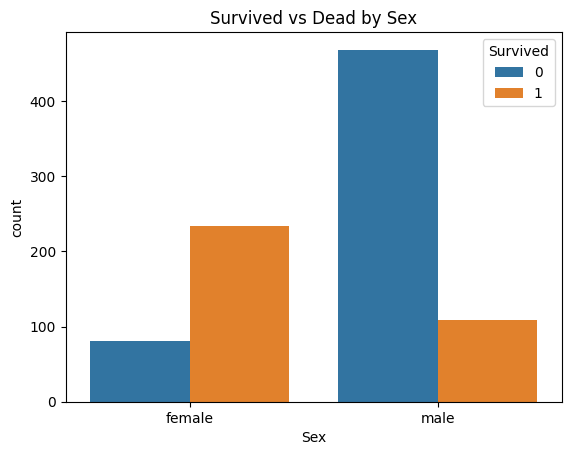

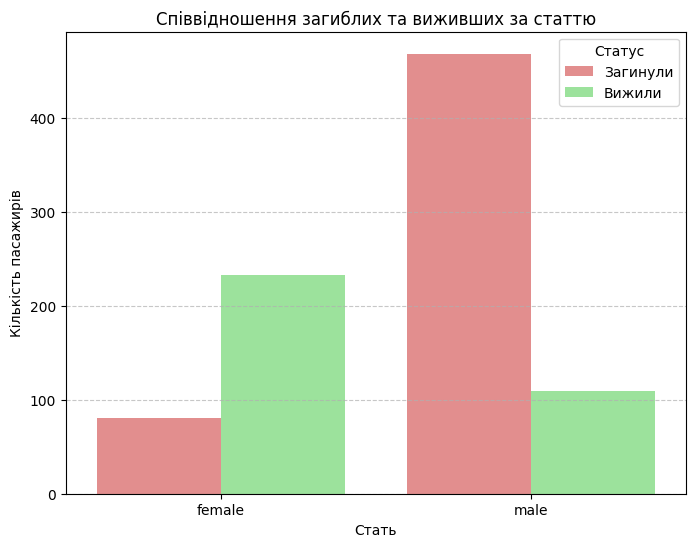

In [15]:
gender_survival = df.groupby(['Sex', 'Survived'], as_index=False).size()
gender_survival['Survived'] = gender_survival['Survived'].map({0: 'Загинули', 1: 'Вижили'})

plt.figure(figsize=(8, 6))
sns.barplot(data=gender_survival, x='Sex', y='size', hue='Survived', palette=['lightcoral', 'lightgreen'])

plt.title('Співвідношення загиблих та виживших за статтю')
plt.xlabel('Стать')
plt.ylabel('Кількість пасажирів')
plt.legend(title='Статус')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Ця діаграма демонструє чітку різницю у шансах на виживання між чоловіками та жінками.
Серед жінок більшість — вижили, що свідчить про принцип «жінки та діти — першими».
Серед чоловіків, навпаки, більшість — загинули.
Це вказує на вплив статі на шанси на порятунок, можливо через пріоритет під час посадки на рятувальні човни (як і в наші часи вивезти жінок і дітей було пріоритетом)

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

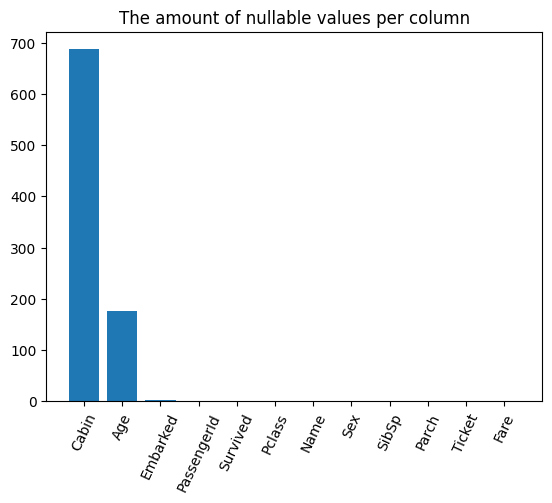

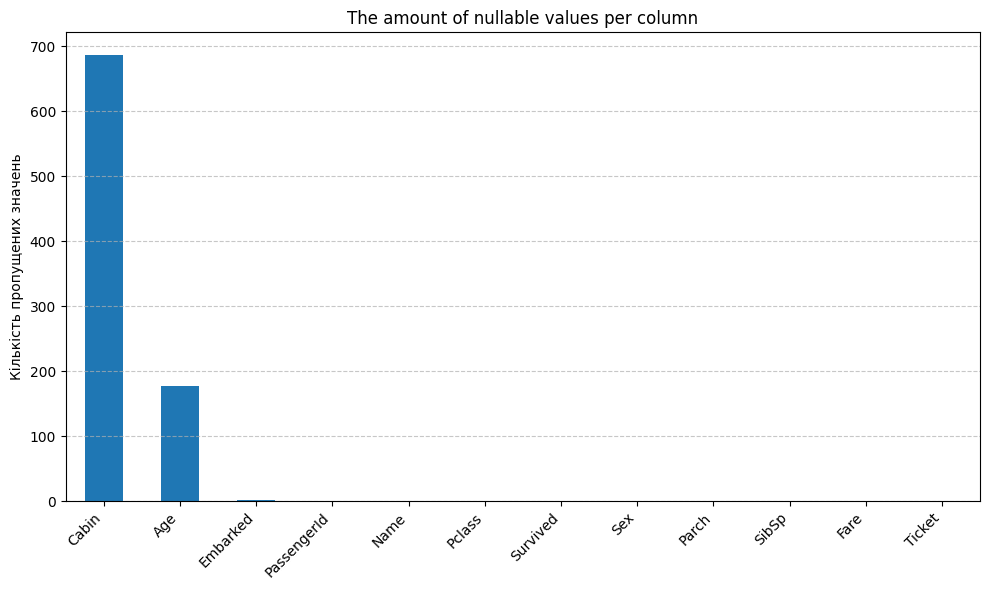

In [17]:
null_counts = df.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar')
plt.title('The amount of nullable values per column')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Кількість пропущених значень')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

З цієї діаграми можна побачити, що більше всього пустих записів із кабін, оскільки, на мою думку, це було найважче зрозуміти. Також, багато пустих записів про вік і лише кілька про те, чи відправився пасажир в дорогу.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

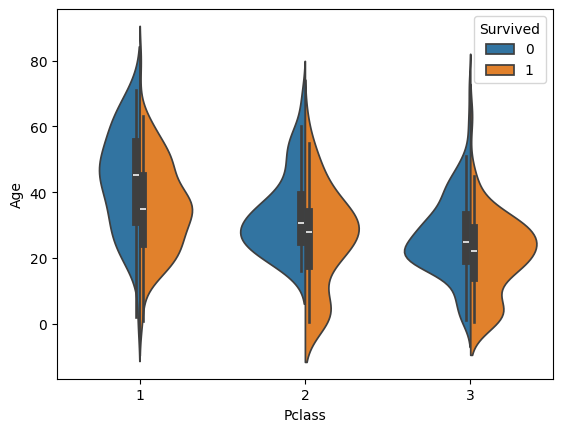

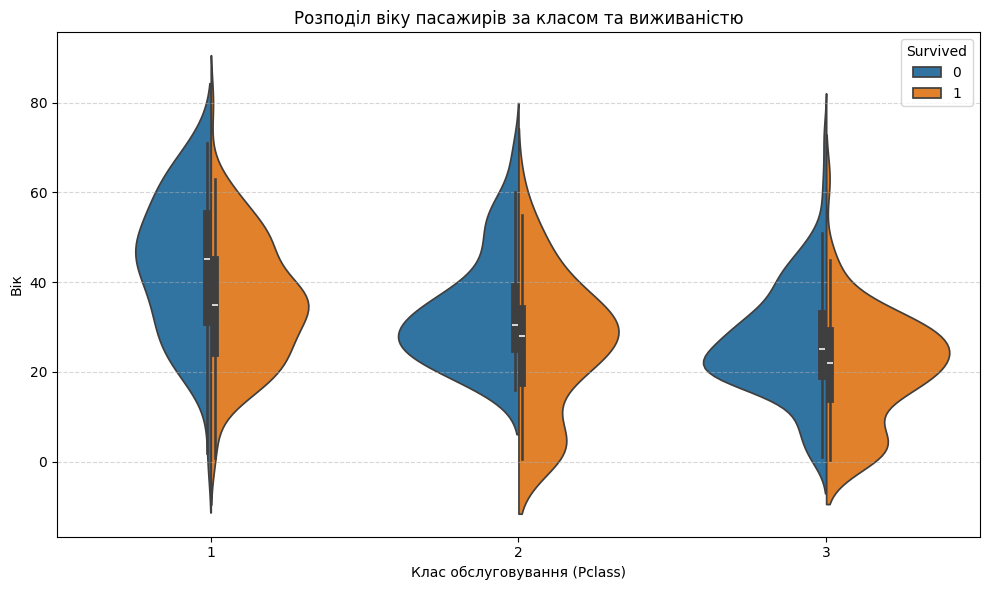

In [18]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)
plt.title('Розподіл віку пасажирів за класом та виживаністю')
plt.xlabel('Клас обслуговування (Pclass)')
plt.ylabel('Вік')
plt.legend(title='Survived')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Це violin plot графік, який відображає розподіл віку пасажирів по класах з поділом на тих, хто вижив і не вижив. Видно, що пасажири 1-го класу були в середньому старші та мали вищий рівень виживання. У 2-му та 3-му класах переважали молодші пасажири, але в 3-му класі шанс на виживання був помітно нижчий.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


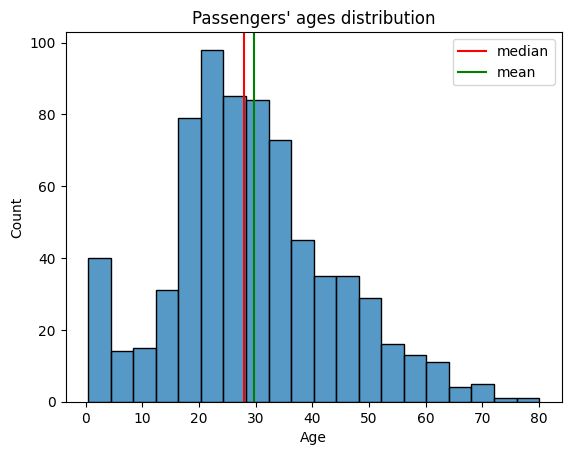

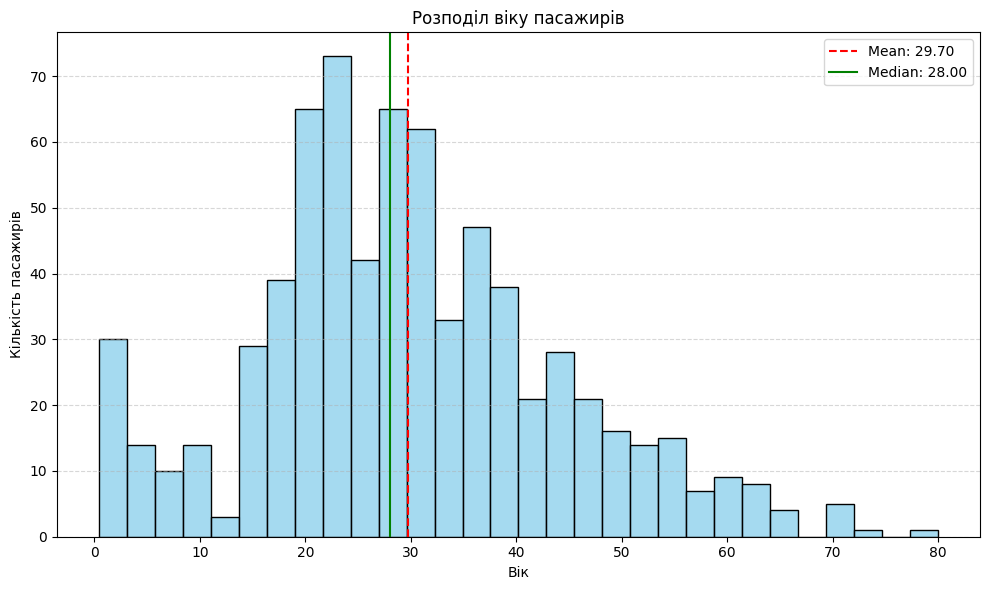

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=False, color='skyblue', edgecolor='black')

mean_age = df['Age'].mean()
median_age = df['Age'].median()

plt.axvline(mean_age, color='red', linestyle='--', label=f'Mean: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='-', label=f'Median: {median_age:.2f}')

plt.title('Розподіл віку пасажирів')
plt.xlabel('Вік')
plt.ylabel('Кількість пасажирів')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

З графіку видно, що більшість пасажирів мають вік близько до середнього, з більшістю вікових груп зосереджених у середньому діапазоні. Червона пунктирна лінія (середнє) і зелена суцільна лінія (медіана) близькі, що вказує на відносно симетричний розподіл віку без великих відхилень. Вік розподілений в межах певного діапазону, без значних екстремальних значень.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Бізнес-питання:
Як кількість братів/сестер або чоловіків/жінок на борту впливає на ймовірність вижити?

Пасажири з однаковими номерами квитків:
                                                  Name      Ticket  Pclass  \
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)      113803       1   
7                       Palsson, Master. Gosta Leonard      349909       3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)      347742       3   
9                  Nasser, Mrs. Nicholas (Adele Achem)      237736       2   
10                     Sandstrom, Miss. Marguerite Rut     PP 9549       3   
..                                                 ...         ...     ...   
876                      Gustafsson, Mr. Alfred Ossian        7534       3   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)       11767       1   
880       Shelley, Mrs. William (Imanita Parrish Hall)      230433       2   
885               Rice, Mrs. William (Margaret Norton)      382652       3   
888           Johnston, Miss. Catherine Helen "Carrie"  W./C. 6607       3   

      Age  Survived  
3

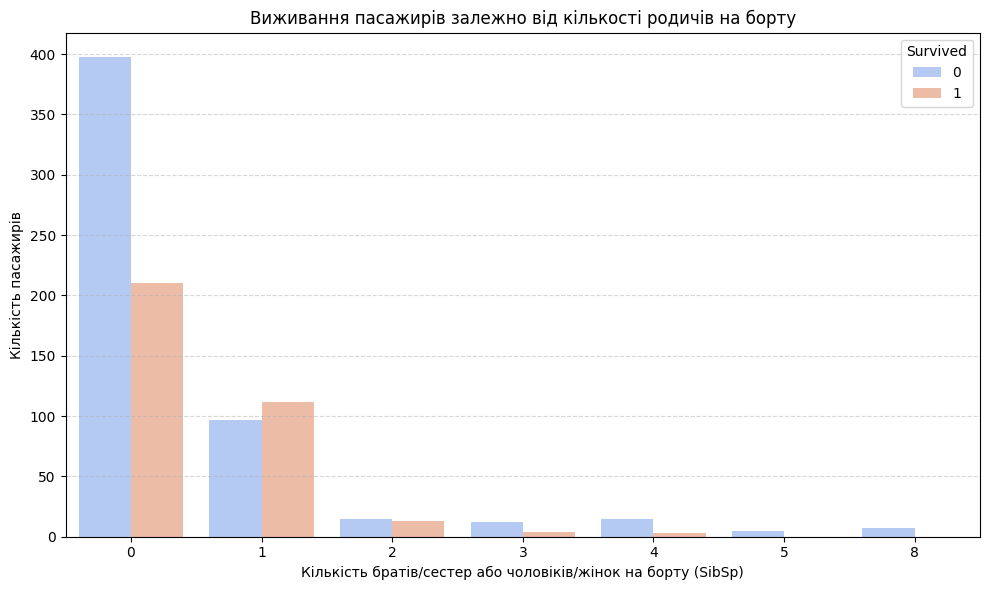

In [22]:
same_ticket = df[df.duplicated('Ticket', keep=False)]

print("Пасажири з однаковими номерами квитків:")
print(same_ticket[['Name', 'Ticket', 'Pclass', 'Age', 'Survived']])

same_lastname = df[df['Name'].str.contains('Smith', case=False, na=False)]
print("\nПасажири з однаковими прізвищами (можливо родичі):")
print(same_lastname[['Name', 'Ticket', 'Pclass', 'Age', 'Survived']])

same_ticket_grouped = df.groupby('Ticket')['PassengerId'].apply(list)

print("\nГрупи пасажирів з однаковими номерами квитків:")
for ticket, group in same_ticket_grouped.items():
    if len(group) > 1:
        print(f"Квиток: {ticket} — Пасажири: {group}")

plt.figure(figsize=(10, 6))
sns.countplot(x='SibSp', hue='Survived', data=df, palette='coolwarm')

plt.title('Виживання пасажирів залежно від кількості родичів на борту')
plt.xlabel('Кількість братів/сестер або чоловіків/жінок на борту (SibSp)')
plt.ylabel('Кількість пасажирів')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Діаграма показує, що наявність родичів на борту позитивно корелює з ймовірністю вижити. Пасажири з родинами мали більший шанс вижити, що могло бути зумовлено різними факторами, такими як наявність рятувальних шлюпок для сімей, пріоритет евакуації для жінок і дітей або просто допомога родичів один одному.
На противагу цьому, пасажири без родичів мали менше шансів на порятунок, що може бути пов'язано з тим, що вони не мали такої ж підтримки, як ті, хто подорожував з родинами.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

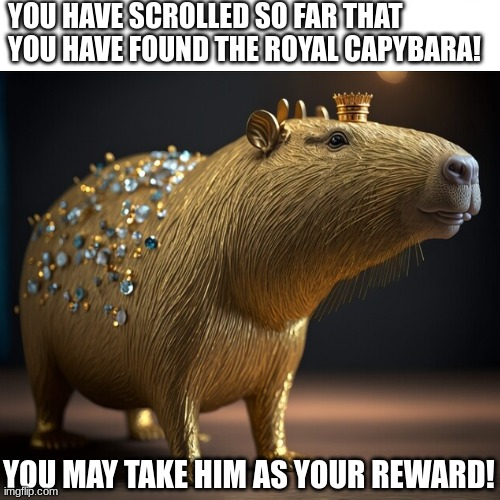